In [93]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/"
fname = "CentralDifferenceLocal_Crankshaft-73800Hexa"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = False
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

Number_Ranks  Number_Threads  Nodes_X_Threads        P1        P2        P4
0              1               1                1    1.0000    1.0000    1.0000
1              1               2                2    1.5667    1.8492    1.6255
2              1               4                4    2.9058    3.4985    3.1939
3              1               8                8    5.0137    6.6092    5.5845
4              1              16               16    6.8764   10.6653   11.0326
5              1              20               20    5.8428   12.4293   12.5102
6              1              40               40    8.4904   13.3687   14.2712
7              2               1                2    1.9094    1.9299    1.9620
8              2               2                4    2.8111    3.5078    3.1086
9              2               4                8    4.7360    6.5273    5.9889
10             2               8               16    7.1483   11.8762   12.4724
11             2              16               32    9.8465   17.1621   20.3534
12             2              20               40   10.4025   17.4030   24.8209
13             2              40               80   14.7503   21.1818   28.8811
14             4               1                4    4.2580    4.1234    4.1995
15             4               2                8    5.9780    7.3404    7.5499
16             4               4               16   10.8074   13.8262   13.1654
17             4               8               32   17.0077   24.7511   27.7849
18             4              16               64   20.0268   34.9694   43.1503
19             4              20               80   22.0550   36.0056   52.6851
20             4              40              160   30.8630   36.0943   55.7215
21             8               1                8    7.9336    7.8393    7.9119
22             8               2               16   11.1071   14.2103   15.2480
23             8               4               32   16.8862   25.2408   30.0348
24             8               8               64   26.5288   43.6200   52.6608
25             8              16              128   32.1960   67.6869   91.5302
26             8              20              160   37.4314   63.9023  100.3757
27             8              40              320   45.2638   68.6773  124.4349
28            16               1               16   15.9496   16.5719   15.9245
29            16               2               32   20.5797   30.6850   30.8398
30            16               4               64   35.9058   58.2371   61.0933
31            16               8              128   47.4119  102.9929  117.3295
32            16              16              256   57.2077  165.9562  197.1269
33            16              20              320   58.5912  142.1988  218.0242
34            16              40              640   73.8643  203.5312  243.0442
35            20               1               20   19.8261   20.7971   19.8921
36            20               2               40   26.4203   38.1313   39.0425
37            20               4               80   45.8854   74.7559   77.1291
38            20               8              160   56.7721  134.4267  129.9555
39            20              16              320   77.5900  201.2002  239.1681
40            20              20              400   76.6693  192.3265  293.2173
41            20              40              800   76.6693  265.8313  216.9604
42            25               1               25   25.0025   26.2640   24.9400
43            25               2               50   32.1000   47.6900   48.7417
44            25               4              100   52.5257   85.4695   95.6914
45            25               8              200   75.4163  152.3836  178.2519
46            25              16              400   78.1532  266.4072  260.2343
47            25              20              500  101.0531  226.6376  254.4634
48            25              40             1000   81.0284  300.3751  257.8724
49  

In [94]:
df.columns

Index(['Number_Ranks', 'Number_Threads', 'Nodes_X_Threads', 'P1', 'P2', 'P4'], dtype='object')

In [95]:
# print(df.columns)
aggregate_operations = {
    'P1':'max',
    'P2':'max',
    'P4':'max'
}
df_threads = df.groupby(['Number_Threads'], as_index=False).agg(aggregate_operations)
df_threads["Ideal Speedup"] = df_threads["Number_Threads"]
df_threads

Number_Threads        P1        P2        P4  Ideal Speedup
0               1   32.4005   34.4772   31.9044              1
1               2   43.5942   62.0452   61.1277              2
2               4   63.3398  111.3286  121.8902              4
3               8  100.0103  197.3894  222.5584              8
4              16   92.2074  303.7885  407.8230             16
5              20  101.4764  302.2949  334.3606             20
6              40   93.0038  361.0499  462.9595             40

In [96]:
# print(df.columns)
aggregate_operations = {
    'P1':'max',
    'P2':'max',
    'P4':'max'
}
df_ranks = df.groupby(['Number_Ranks'], as_index=False).agg(aggregate_operations)
df_ranks["Ideal Speedup"] = df_ranks["Number_Ranks"]
df_ranks.columns
df_ranks

Index(['Number_Ranks', 'Number_Threads', 'Nodes_X_Threads', 'P1', 'P2', 'P4'], dtype='object')


Number_Ranks        P1        P2        P4  Ideal Speedup
0             1    8.4904   13.3687   14.2712              1
1             2   14.7503   21.1818   28.8811              2
2             4   30.8630   36.0943   55.7215              4
3             8   45.2638   68.6773  124.4349              8
4            16   73.8643  203.5312  243.0442             16
5            20   77.5900  265.8313  293.2173             20
6            25  101.0531  300.3751  260.2343             25
7            30  101.4764  361.0499  462.9595             30

In [98]:
# print(df.columns)
aggregate_operations = {
    'P1':'max',
    'P2':'max',
    'P4':'max'
}
df_nodes_threads = df.groupby(['Nodes_X_Threads'], as_index=False).agg(aggregate_operations)
df_nodes_threads["Ideal Speedup"] = df_nodes_threads["Nodes_X_Threads"]
df_nodes_threads.columns
df_nodes_threads

Nodes_X_Threads        P1        P2        P4  Ideal Speedup
0                 1    1.0000    1.0000    1.0000              1
1                 2    1.9094    1.9299    1.9620              2
2                 4    4.2580    4.1234    4.1995              4
3                 8    7.9336    7.8393    7.9119              8
4                16   15.9496   16.5719   15.9245             16
5                20   19.8261   20.7971   19.8921             20
6                25   25.0025   26.2640   24.9400             25
7                30   32.4005   34.4772   31.9044             30
8                32   20.5797   30.6850   30.8398             32
9                40   26.4203   38.1313   39.0425             40
10               50   32.1000   47.6900   48.7417             50
11               60   43.5942   62.0452   61.1277             60
12               64   35.9058   58.2371   61.0933             64
13               80   45.8854   74.7559   77.1291             80
14              100   52.5257   85.4695   95.6914            100
15              120   63.3398  111.3286  121.8902            120
16              128   47.4119  102.9929  117.3295            128
17              160   56.7721  134.4267  129.9555            160
18              200   75.4163  152.3836  178.2519            200
19              240  100.0103  197.3894  222.5584            240
20              256   57.2077  165.9562  197.1269            256
21              320   77.5900  201.2002  239.1681            320
22              400   78.1532  266.4072  293.2173            400
23              480   92.2074  303.7885  407.8230            480
24              500  101.0531  226.6376  254.4634            500
25              600  101.4764  302.2949  334.3606            600
26              640   73.8643  203.5312  243.0442            640
27              800   76.6693  265.8313  216.9604            800
28             1000   81.0284  300.3751  257.8724           1000
29             1200   93.0038  361.0499  462.9595           1200

In [121]:
# df_result = pd.merge(pd.merge(df_ranks, df_threads, on='name'),df3,on='name')

df_result = pd.merge(df_nodes_threads, df, on=['P1', 'P2', 'P4'], left_index=True, how='inner', suffixes=('', '_y')).drop('Nodes_X_Threads_y', 1)
df_result

Nodes_X_Threads        P1        P2        P4  Ideal Speedup  Number_Ranks  Number_Threads
0                 1    1.0000    1.0000    1.0000              1             1               1
7                 2    1.9094    1.9299    1.9620              2             2               1
14                4    4.2580    4.1234    4.1995              4             4               1
21                8    7.9336    7.8393    7.9119              8             8               1
28               16   15.9496   16.5719   15.9245             16            16               1
35               20   19.8261   20.7971   19.8921             20            20               1
42               25   25.0025   26.2640   24.9400             25            25               1
49               30   32.4005   34.4772   31.9044             30            30               1
29               32   20.5797   30.6850   30.8398             32            16               2
36               40   26.4203   38.1313   39.0425             40            20               2
43               50   32.1000   47.6900   48.7417             50            25               2
50               60   43.5942   62.0452   61.1277             60            30               2
30               64   35.9058   58.2371   61.0933             64            16               4
37               80   45.8854   74.7559   77.1291             80            20               4
44              100   52.5257   85.4695   95.6914            100            25               4
51              120   63.3398  111.3286  121.8902            120            30               4
31              128   47.4119  102.9929  117.3295            128            16               8
38              160   56.7721  134.4267  129.9555            160            20               8
45              200   75.4163  152.3836  178.2519            200            25               8
52              240  100.0103  197.3894  222.5584            240            30               8
32              256   57.2077  165.9562  197.1269            256            16              16
39              320   77.5900  201.2002  239.1681            320            20              16
53              480   92.2074  303.7885  407.8230            480            30              16
47              500  101.0531  226.6376  254.4634            500            25              20
54              600  101.4764  302.2949  334.3606            600            30              20
34              640   73.8643  203.5312  243.0442            640            16              40
41              800   76.6693  265.8313  216.9604            800            20              40
48             1000   81.0284  300.3751  257.8724           1000            25              40
55             1200   93.0038  361.0499  462.9595           1200            30              40

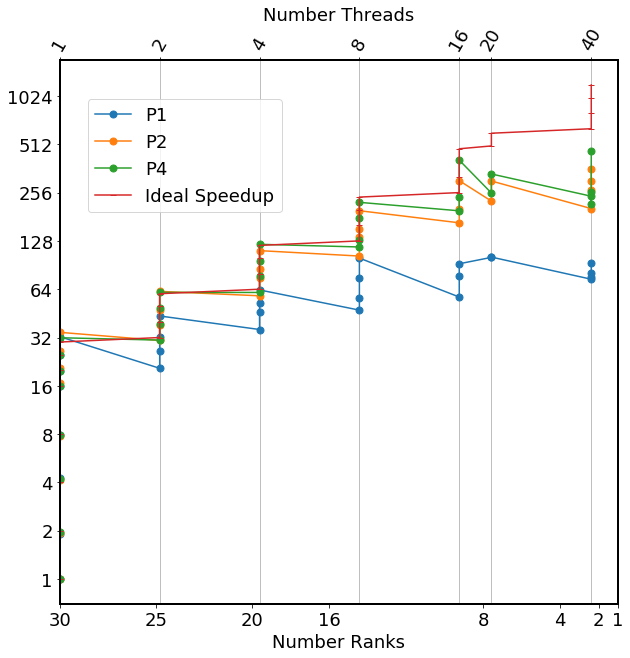

In [129]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#   Plotar os valores dos graficos para P1, P2 e P4.
plt.plot(df_result['Number_Threads'], df_result['P1'], marker='.', markersize=14)
plt.plot(df_result['Number_Threads'], df_result['P2'], marker='.', markersize=14)
plt.plot(df_result['Number_Threads'], df_result['P4'], marker='.', markersize=14)
plt.plot(df_result['Number_Threads'], df_result['Ideal Speedup'], marker='_')


#  Define a escala do grafico
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 40], [1, 2, 4, 8, 16, 20, 40], rotation=60)
plt.yticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

ax2.set_xlim(40)
ax2.set_xticks([1, 2, 4, 8, 16, 20, 40])
ax2.set_xticklabels([1, 2, 4, 8, 16, 20, 40])
ax2.set_xlabel("Number Threads")

ax1.set_xlim(30)
ax1.set_xticks([30, 25, 20, 16, 8, 4, 2, 1])
ax1.set_xticklabels([30, 25, 20, 16, 8, 4, 2, 1])
ax1.set_xlabel("Number Ranks")


# lines = [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.2') 

#   Plota os labels
# plt.xlabel('Nodes X Threads')
plt.ylabel('Speedup')
#   Plota a legenda e o tamanho da figura
plt.legend(loc=(0.05, .72), frameon = True)
plt.grid()
plt.show()